<a href="https://colab.research.google.com/github/ProxMaq/ProxVision/blob/main/TRR%20%26%20CDI/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_height=28
img_width=28
batch_size=2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

Detection  drive  sample_data


In [ ]:
!unzip '/content/drive/MyDrive/Detection.zip' -d '/content/Detection'

Archive:  /content/drive/MyDrive/Detection.zip
replace /content/Detection/Detection/Currency/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
model=keras.Sequential([
    layers.Input((28,28,1)),
    layers.Conv2D(16,3,padding='same'),
    layers.Conv2D(32,3,padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(2),
                        
])

In [ ]:
ds_train=tf.keras.preprocessing.image_dataset_from_directory('/content/Detection/Detection', 
                                                             labels='inferred',
                                                             label_mode="int",
                                                             color_mode='grayscale',
                                                             batch_size=batch_size,
                                                             image_size=(img_height,img_width),
                                                             shuffle=True,
                                                             seed=123,
                                                             validation_split=0.1,
                                                             subset="training")

Found 399 files belonging to 2 classes.
Using 360 files for training.


In [ ]:
ds_valid=tf.keras.preprocessing.image_dataset_from_directory('/content/Detection/Detection', 
                                                             labels='inferred',
                                                             label_mode="int",
                                                             color_mode='grayscale',
                                                             batch_size=batch_size,
                                                             image_size=(img_height,img_width),
                                                             shuffle=True,
                                                             seed=123,
                                                             validation_split=0.1,
                                                             subset="validation")

Found 399 files belonging to 2 classes.
Using 39 files for validation.


In [ ]:
def augment(x,y):
  image=tf.image.random_brightness(x,max_delta=0.5)
  return image,y

In [ ]:
ds_train=ds_train.map(augment)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],

)

In [ ]:
history=model.fit(ds_train,validation_data=ds_valid,epochs=20,verbose=2)

Epoch 1/20
180/180 - 5s - loss: 13.8601 - accuracy: 0.6778 - val_loss: 15.9607 - val_accuracy: 0.6923
Epoch 2/20
180/180 - 1s - loss: 5.0723 - accuracy: 0.8222 - val_loss: 12.4338 - val_accuracy: 0.6923
Epoch 3/20
180/180 - 1s - loss: 1.5863 - accuracy: 0.9194 - val_loss: 12.2420 - val_accuracy: 0.7436
Epoch 4/20
180/180 - 1s - loss: 1.3140 - accuracy: 0.9167 - val_loss: 14.6210 - val_accuracy: 0.6667
Epoch 5/20
180/180 - 1s - loss: 1.1163 - accuracy: 0.9444 - val_loss: 26.1964 - val_accuracy: 0.7436
Epoch 6/20
180/180 - 1s - loss: 6.8734 - accuracy: 0.8444 - val_loss: 10.8267 - val_accuracy: 0.8462
Epoch 7/20
180/180 - 1s - loss: 0.8086 - accuracy: 0.9667 - val_loss: 11.4144 - val_accuracy: 0.8205
Epoch 8/20
180/180 - 1s - loss: 0.6624 - accuracy: 0.9583 - val_loss: 15.0828 - val_accuracy: 0.7692
Epoch 9/20
180/180 - 1s - loss: 0.4654 - accuracy: 0.9806 - val_loss: 18.6743 - val_accuracy: 0.7949
Epoch 10/20
180/180 - 1s - loss: 0.4938 - accuracy: 0.9778 - val_loss: 16.1824 - val_accur

In [ ]:
#model.save('/content/Detection/Detection/detection_model.h5')

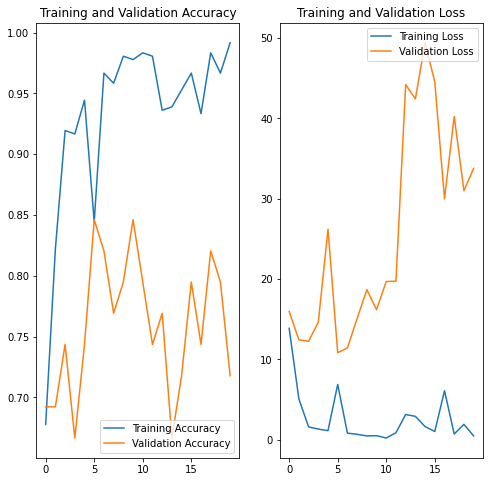

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=5,
    zoom_range=(0.95, 0.95),
    horizontal_flip=False,
    vertical_flip=False,
    data_format="channels_last",
    validation_split=0.0,
    dtype=tf.float32,
)

In [ ]:
train_generator = datagen.flow_from_directory(
    "/content/Detection/Detection",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="sparse",
    shuffle=True,
    subset="training",
    seed=123,
)


Found 399 images belonging to 2 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    "/content/Detection/Detection",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="sparse",
    shuffle=True,
    subset="validation",
    seed=123,
)


Found 0 images belonging to 2 classes.


In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

In [ ]:
for epoch in range(10):
    num_batches = 0

    for x, y in ds_train:
        num_batches += 1

        if num_batches == 199:  # len(train_dataset)/batch_size
            break

In [ ]:
# using model.fit (note steps_per_epoch)
model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=25,
    verbose=2,
    # if we had a validation generator:
    validation_data=validation_generator,
    #valiation_steps=len(validation_set)/batch_size)

)

Epoch 1/20
25/25 - 1s - loss: 0.2384 - accuracy: 0.9200
Epoch 2/20
25/25 - 1s - loss: 0.2370 - accuracy: 0.9200
Epoch 3/20
25/25 - 1s - loss: 0.3015 - accuracy: 0.9000
Epoch 4/20
25/25 - 1s - loss: 0.1787 - accuracy: 0.9400
Epoch 5/20
25/25 - 1s - loss: 0.2320 - accuracy: 0.9388
Epoch 6/20
25/25 - 1s - loss: 0.1643 - accuracy: 0.9400
Epoch 7/20
25/25 - 1s - loss: 0.1558 - accuracy: 0.9400
Epoch 8/20
25/25 - 1s - loss: 0.1421 - accuracy: 0.9800
Epoch 9/20
25/25 - 1s - loss: 0.1874 - accuracy: 0.9200
Epoch 10/20
25/25 - 1s - loss: 0.1677 - accuracy: 0.9000
Epoch 11/20
25/25 - 1s - loss: 0.0963 - accuracy: 0.9592
Epoch 12/20
25/25 - 1s - loss: 0.2078 - accuracy: 0.9200
Epoch 13/20
25/25 - 1s - loss: 0.1806 - accuracy: 0.9000
Epoch 14/20
25/25 - 1s - loss: 0.0578 - accuracy: 1.0000
Epoch 15/20
25/25 - 1s - loss: 0.1047 - accuracy: 0.9800
Epoch 16/20
25/25 - 1s - loss: 0.0903 - accuracy: 0.9600
Epoch 17/20
25/25 - 1s - loss: 0.0321 - accuracy: 1.0000
Epoch 18/20
25/25 - 1s - loss: 0.1397 - 